Deep learning and foundational models¶
Keras MLPs with residual connections, adaptive learning rates and adaptive batch sizes
Keras self-normalizing MLPs with residual connections
Keras neural architecture search MLPs using hyperband
DeepCTR
Neural Factorization Machines
AutoInt
Cross Networks
Pretrained CNNs for images using foundational models (especially EfficientNet)
Manually pruned and optimized for faster inference
Pretrained + fine-tuned CNNs for images
Image augmentation
Pretrained TinyBERT models for text
Keras Text CNNs
Fastext models for text

In [1]:
!pip install tensorflow  

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 MB 7.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 95.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 84.5 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 85.1 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2

Epoch 1/50


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3051 - loss: -3.0007 - val_accuracy: 0.2628 - val_loss: -41.6268
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3079 - loss: -93.7063 - val_accuracy: 0.2628 - val_loss: -463.6147
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3082 - loss: -733.9199 - val_accuracy: 0.2628 - val_loss: -1973.9099
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2992 - loss: -2489.4622 - val_accuracy: 0.2628 - val_loss: -5221.4517
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3057 - loss: -6210.4150 - val_accuracy: 0.2628 - val_loss: -10755.6562
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3036 - loss: -11726.9902 - val_accuracy: 0.2628 - val_loss: -18980.1289
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3072 - loss: -20646.0625 - val_accuracy: 0.2628 - val_loss: -30535.2988
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

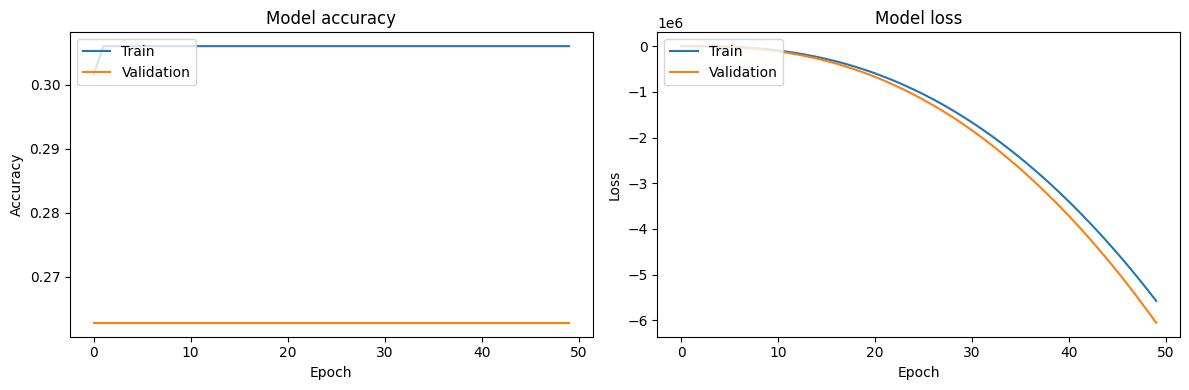

In [2]:
# deep leaning using keras 1st basic  

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the dataset
data = pd.read_csv('/teamspace/studios/this_studio/data/csv-clean/processed_combined_data_final_3.csv')

# Assume the last column is the target variable
X = data.drop(columns=['Stay']).values
y = data['Stay'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)


# Define the MLP model
model = Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add the second hidden layer
model.add(Dense(units=32, activation='relu'))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))  # Use 'softmax' for multi-class classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()




Epoch 1/50


124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2919 - loss: -54.1030 - val_accuracy: 0.3053 - val_loss: -1547.8827 - learning_rate: 0.0010
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3007 - loss: -7693.0703 - val_accuracy: 0.3053 - val_loss: -47836.4727 - learning_rate: 0.0010
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2951 - loss: -89071.2188 - val_accuracy: 0.3053 - val_loss: -320841.4062 - learning_rate: 0.0010
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2971 - loss: -460761.5000 - val_accuracy: 0.3053 - val_loss: -1140732.3750 - learning_rate: 0.0010
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2993 - loss: -1452844.8750 - val_accuracy: 0.3053 - val_loss: -2922999.2500 - learning_rate: 0.0010
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2986 - loss: -3481086.2500 - val_accuracy: 0.3053 - val_loss: -6154620.5000 - learning_rate: 0.0010
Epoch 7/50
124/124 ━━━━━━━━━━━━━

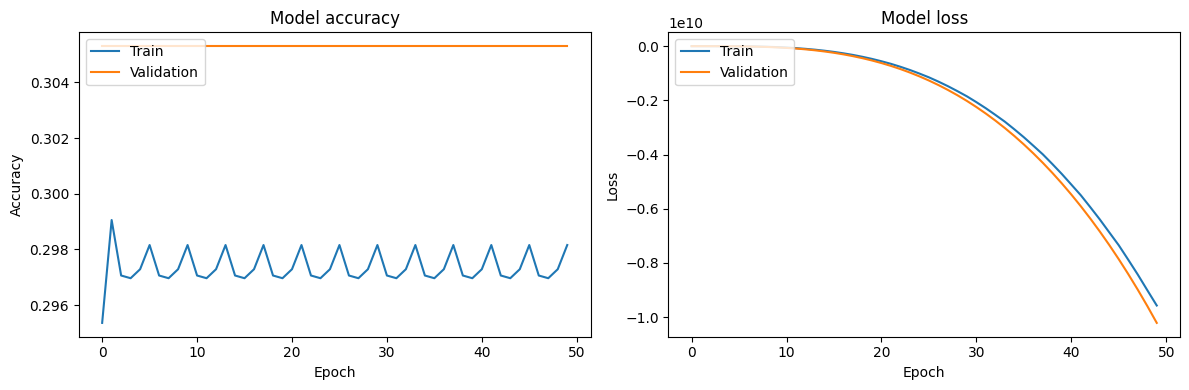

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.data import Dataset

# Load the dataset
data = pd.read_csv('/teamspace/studios/this_studio/data/csv-clean/processed_combined_data_final_3.csv')

# Drop unnecessary columns (assuming there might be some based on earlier context)
#columns_to_drop = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1']  # Add any other columns that are not needed
#data = data.drop(columns=columns_to_drop, errors='ignore')

# Separate features and target
X = data.drop(columns=['Stay']).values
y = data['Stay'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Define the input layer
inputs = Input(shape=(X_train.shape[1],))

# First hidden layer
x = Dense(units=64, activation='relu')(inputs)
residual = x

# Second hidden layer with residual connection
x = Dense(units=64, activation='relu')(x)
x = Add()([x, residual])  # Adding residual connection

# Third hidden layer
x = Dense(units=32, activation='relu')(x)

# Output layer
outputs = Dense(units=1, activation='sigmoid')(x)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model with an adaptive learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for adaptive learning rates and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define a function for adaptive batch sizes
def batch_generator(X, y, initial_batch_size=32, max_batch_size=256, batch_factor=2):
    current_batch_size = initial_batch_size
    while True:
        for i in range(0, len(X), current_batch_size):
            X_batch = X[i:i+current_batch_size]
            y_batch = y[i:i+current_batch_size]
            yield X_batch, y_batch
        current_batch_size = min(current_batch_size * batch_factor, max_batch_size)

# Create dataset for adaptive batch sizes
train_dataset = Dataset.from_generator(lambda: batch_generator(X_train, y_train), 
                                       output_signature=(tf.TensorSpec(shape=(None, X_train.shape[1]), dtype=tf.float32),
                                                         tf.TensorSpec(shape=(None,), dtype=tf.float32)))

val_dataset = Dataset.from_tensor_slices((X_test, y_test)).batch(32)

# Train the model using the adaptive batch size dataset
history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=val_dataset,
                    steps_per_epoch=len(X_train) // 32,  # Assuming initial batch size of 32
                    callbacks=[reduce_lr, early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()



Keras self-normalizing MLPs with residual connections


Epoch 1/50


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3034 - loss: -32.6246 - val_accuracy: 0.2628 - val_loss: -407.5185 - learning_rate: 0.0010
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3050 - loss: -975.1216 - val_accuracy: 0.2628 - val_loss: -5426.7446 - learning_rate: 0.0010
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2989 - loss: -8955.9414 - val_accuracy: 0.2628 - val_loss: -27371.6895 - learning_rate: 0.0010
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3054 - loss: -37351.4570 - val_accuracy: 0.2628 - val_loss: -85251.0156 - learning_rate: 0.0010
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3219 - loss: -106288.3203 - val_accuracy: 0.2628 - val_loss: -205856.7188 - learning_rate: 0.0010
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3093 - loss: -234992.9844 - val_accuracy: 0.2628 - val_loss: -424295.2812 - learning_rate: 0.0010
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2

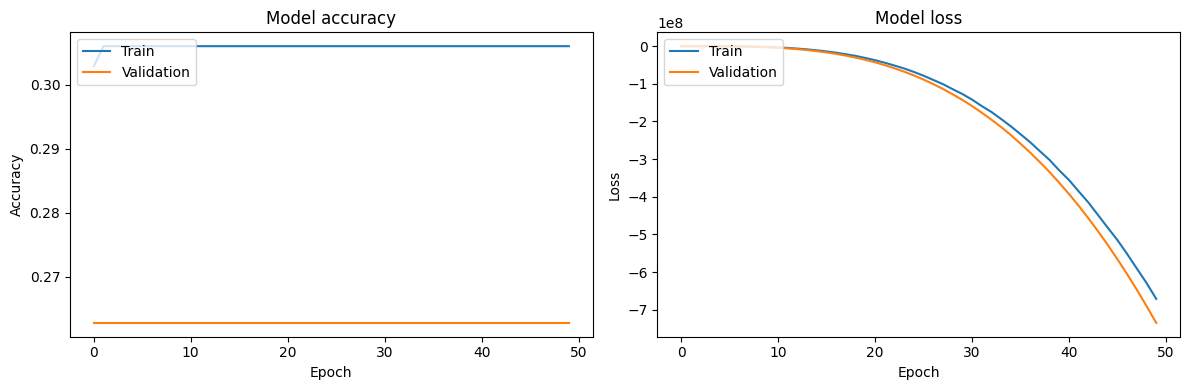

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Add, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import selu
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


#same above part 

# Define the input layer
inputs = Input(shape=(X_train.shape[1],))

# First hidden layer
x = Dense(units=64, activation=selu)(inputs)
residual = x

# Second hidden layer with residual connection
x = Dense(units=64, activation=selu)(x)
x = Add()([x, residual])  # Adding residual connection

# Optional dropout layer for regularization
x = Dropout(0.1)(x)

# Third hidden layer
x = Dense(units=32, activation=selu)(x)

# Output layer
outputs = Dense(units=1, activation='sigmoid')(x)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for adaptive learning rates and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[reduce_lr, early_stopping])


# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()



Keras neural architecture search MLPs using hyperband


In [6]:
! pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 11.0 MB/s eta 0:00:00


Trial 65 Complete [00h 00m 16s]
val_accuracy: 0.262828528881073

Best val_accuracy So Far: 0.262828528881073
Total elapsed time: 00h 03m 28s


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.3082 - loss: -188.3950
Test Accuracy: 0.3053
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy: 0.3053
Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3143 - loss: -246.4464 - val_accuracy: 0.2628 - val_loss: -514.8921 - learning_rate: 0.0014
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2973 - loss: -598.6401 - val_accuracy: 0.2628 - val_loss: -1039.4905 - learning_rate: 0.0014
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3057 - loss: -1084.4062 - val_accuracy: 0.2628 - val_loss: -1803.9082 - learning_rate: 0.0014
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3097 - loss: -1974.9594 - val_accuracy: 0.2628 - val_loss: -2829.1753 - learning_rate: 0.0014
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3044 - loss: -2938.2603 - val_accuracy: 0.2628 - val_loss: -4098.0938 - learning_rate: 0.0014
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

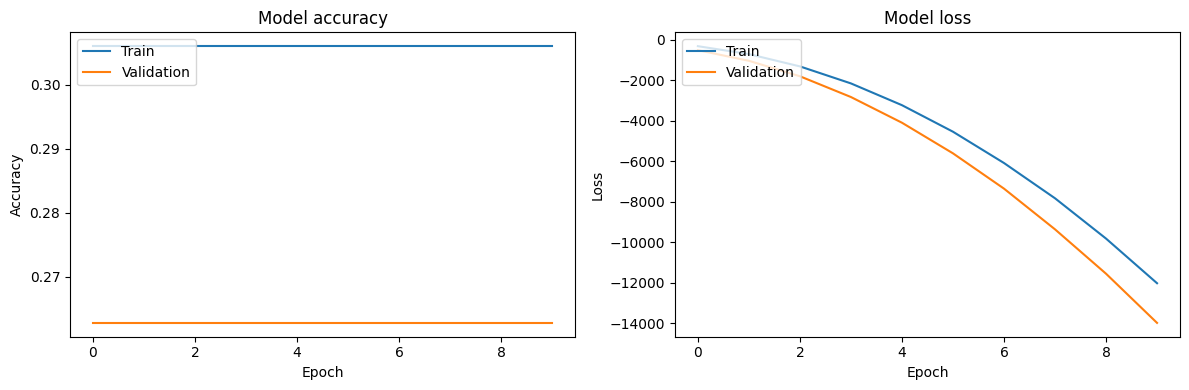

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Add, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import selu
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import keras_tuner as kt



# above same 


def build_model(hp):
    inputs = Input(shape=(X_train.shape[1],))
    
    x = inputs
    for i in range(hp.Int('num_layers', 1, 3)):
        units = hp.Int(f'units_{i}', min_value=32, max_value=512, step=32)
        x = Dense(units=units, activation=selu)(x)
        
        if hp.Boolean(f'dropout_{i}'):
            rate = hp.Float(f'dropout_rate_{i}', min_value=0.1, max_value=0.5, step=0.1)
            x = Dropout(rate=rate)(x)
        
        if i > 0 and hp.Boolean(f'residual_{i}'):
            x = Add()([x, residual])
        residual = x
    
    outputs = Dense(units=1, activation='sigmoid')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model


tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='my_dir',
    project_name='hyperband_mlp'
)


stop_early = EarlyStopping(monitor='val_loss', patience=5)

tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Re-train the best model with optimal hyperparameters (optional but recommended)
history = best_model.fit(X_train, y_train, 
                         epochs=50, 
                         validation_split=0.2, 
                         callbacks=[reduce_lr, early_stopping])

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


keras slim

Epoch 1/50


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2738 - loss: -3.0053 - val_accuracy: 0.2628 - val_loss: -40.0294 - learning_rate: 0.0010
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3052 - loss: -97.8150 - val_accuracy: 0.2628 - val_loss: -484.5607 - learning_rate: 0.0010
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3047 - loss: -723.7182 - val_accuracy: 0.2628 - val_loss: -2001.1779 - learning_rate: 0.0010
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3058 - loss: -2473.4163 - val_accuracy: 0.2628 - val_loss: -5115.0903 - learning_rate: 0.0010
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3094 - loss: -5668.9780 - val_accuracy: 0.2628 - val_loss: -10359.5029 - learning_rate: 0.0010
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2934 - loss: -11633.9287 - val_accuracy: 0.2628 - val_loss: -18137.3281 - learning_rate: 0.0010
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc

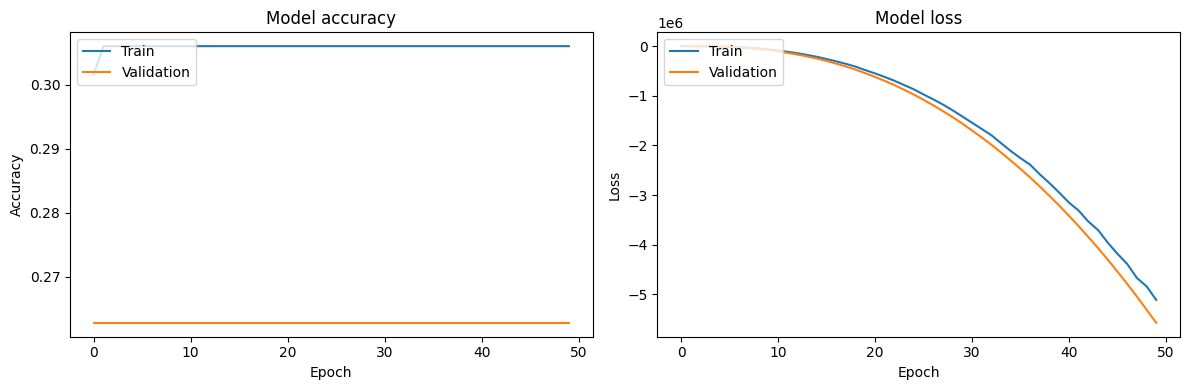

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


#rest above

def create_model(input_dim, learning_rate=0.001, dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=input_dim))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

input_dim = X_train.shape[1]
model = create_model(input_dim)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[reduce_lr, early_stopping])


# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()



AutoInt

In [5]:

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Embedding, Add, LayerNormalization
from tensorflow.keras.layers import MultiHeadAttention
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt







def build_autoint(input_dim, num_heads=4, head_dim=8, num_layers=2, dropout_rate=0.2):
    inputs = Input(shape=(input_dim,))
    
    # Embedding layer
    x = Dense(units=input_dim, activation='relu')(inputs)
    reshaped_input = tf.reshape(x, (-1, input_dim, 1))

    # Multi-Head Attention layers
    for _ in range(num_layers):
        attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=head_dim)(reshaped_input, reshaped_input)
        attn_output = Dropout(dropout_rate)(attn_output)
        attn_output = LayerNormalization(epsilon=1e-6)(attn_output)
        reshaped_input = Add()([reshaped_input, attn_output])
    
    # Flatten the output
    flat_output = Flatten()(reshaped_input)
    
    # Final dense layers
    x = Dense(units=64, activation='relu')(flat_output)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(units=1, activation='sigmoid')(x)
    
    # Define the model
    model = Model(inputs=inputs, outputs=outputs)
    
    # Compile the model
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

input_dim = X_train.shape[1]
model = build_autoint(input_dim)

# Print model summary
model.summary()

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[reduce_lr, early_stopping])


# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()



ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


Cross Network Architecture

In [7]:
class CrossLayer(tf.keras.layers.Layer):
    def __init__(self, num_cross_layers):
        super(CrossLayer, self).__init__()
        self.num_cross_layers = num_cross_layers

    def build(self, input_shape):
        self.cross_weights = [self.add_weight(shape=(input_shape[-1], 1),
                                              initializer='random_normal',
                                              trainable=True,
                                              name=f'cross_weight_{i}') for i in range(self.num_cross_layers)]
        self.cross_biases = [self.add_weight(shape=(input_shape[-1],),
                                             initializer='zeros',
                                             trainable=True,
                                             name=f'cross_bias_{i}') for i in range(self.num_cross_layers)]

    def call(self, inputs):
        x_0 = inputs
        x_l = x_0
        for i in range(self.num_cross_layers):
            x_l = tf.matmul(x_0, x_l @ self.cross_weights[i]) + self.cross_biases[i] + x_l
        return x_l

def build_cross_network(input_dim, num_cross_layers=2, dropout_rate=0.2):
    inputs = Input(shape=(input_dim,))
    
    # Cross Network Layer
    x = CrossLayer(num_cross_layers)(inputs)
    
    # Deep Network Layers
    x = Dense(units=64, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(units=32, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    
    outputs = Dense(units=1, activation='sigmoid')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

input_dim = X_train.shape[1]
model = build_cross_network(input_dim)

# Print model summary
model.summary()
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[reduce_lr, early_stopping])


# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()



Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cross_layer (CrossLayer)        │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,381 (9.30 KB)

 Trainable params: 2,381 (9.30 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


ValueError: Exception encountered when calling CrossLayer.call().

[1mDimensions must be equal, but are 3 and 32 for '{{node functional_9_1/cross_layer_1/MatMul_1}} = MatMul[T=DT_FLOAT, grad_a=false, grad_b=false, transpose_a=false, transpose_b=false](data, functional_9_1/cross_layer_1/matmul)' with input shapes: [32,3], [32,1].[0m

Arguments received by CrossLayer.call():
  • inputs=tf.Tensor(shape=(32, 3), dtype=float32)

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Example data
data = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'feature3': np.random.rand(100),
    'target': np.random.randint(2, size=100)
})

# Separate features and target
X = data.drop(columns=['target']).values
y = data['target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a simple model
model = Sequential([
    Dense(32, input_shape=(X_train.shape[1],), activation='relu'),  # Layer 1
    Dense(16, activation='relu'),                                  # Layer 2
    Dense(1, activation='sigmoid')                                 # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=8, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Access weights and biases
for layer in model.layers:
    weights, biases = layer.get_weights()
    print(f'Layer: {layer.name}')
    print(f'Weights: {weights}')
    print(f'Biases: {biases}')


Epoch 1/10


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5158 - loss: 0.7263 - val_accuracy: 0.2500 - val_loss: 0.8998
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5160 - loss: 0.7377 - val_accuracy: 0.2500 - val_loss: 0.8732
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5397 - loss: 0.7202 - val_accuracy: 0.2500 - val_loss: 0.8572
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4975 - loss: 0.7234 - val_accuracy: 0.2500 - val_loss: 0.8427
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5701 - loss: 0.6740 - val_accuracy: 0.2500 - val_loss: 0.8391
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5494 - loss: 0.6920 - val_accuracy: 0.2500 - val_loss: 0.8309
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5236 - loss: 0.6765 - val_accuracy: 0.2500 - val_loss: 0.8235
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6156 - loss: 0.6582 - val_accuracy: 0.2500 - val_loss: 0.8236
Epoch 9/10
8/8 ━━━